# Scissor

Intuitively, to scissor the single character from the original verification code is to cluster: classify each pixel to a character. As such, there are 7 unique “classed” on one original verification code.  

A Gaussian Mixture Model is a probabilistic model that is often powerful in clustering. It assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. In this case, our GMM takes all pixels belonging to characters as input, and finally outputs 7 unique coordinates of means, which should be centered on each character. The way to obtain the pixels belonging to characters is to threshold at gray scale. Pixels with a gray value lower than 180, say, close to black, will be counted towards characters.


Also load `Tools`

In [1]:
from Tools import *

In [2]:
from PIL import Image, ImageFont, ImageDraw
import numpy as np

from random import randint, choice
from math import sin, cos, radians, fabs

import os,sys
dir_path = os.path.abspath('.')

import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import mixture

The function `scissor` is modified and the modified version is placed in `Tools` so `Model` can import it.

In [3]:
def scissor(im):
    X = []
    im = CenterExtend(im, radius=20)
    vec = Img2Vec(im)
    
    charpoint = []
    for i in range(vec.shape[0]):
        for j in range(vec.shape[1]):
            if vec[i][j] <= 180:
                charpoint.append([i, j])
        
    gmm = mixture.GaussianMixture(n_components=7, covariance_type='tied', reg_covar=1e2, tol=1e3, n_init=9)
    gmm.fit(charpoint)
    centers = gmm.means_
    centers = centers[np.argsort(centers[:, 1])]
    im_c = DrawCenter(im.convert("RGB"), centers)
    plt.figure(figsize=(18, 2))
    h,w = np.shape(im_c)[0:2]
    plt.imshow(im_c)
    plt.xlim((1+20, w-20))
    plt.ylim((h-20, 1+20))
    plt.xticks([])
    plt.yticks([])
        
    plt.figure(figsize=(12, 9))
    for i in range(7):
        cr = crop(im, centers[i,0], centers[i,1], radius=30)
        cr = cr.resize((40, 40), Image.ANTIALIAS)
        sc = np.asarray(cr.convert('RGB').convert('L'), dtype='float64')
        sc[sc <= 180] = 0
        sc[sc > 180] = 255
        X.append(sc)
        plt.subplot(2, 4, i+1)
        disp_image(Image.fromarray(np.uint8(sc.squeeze()*255),mode='L').convert('RGB'))
        
    return X

Open an image to test the Scissor

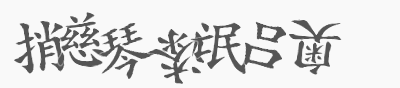

In [6]:
im = Image.open('./captcha/captcha000.gif')
im

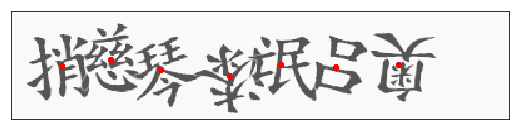

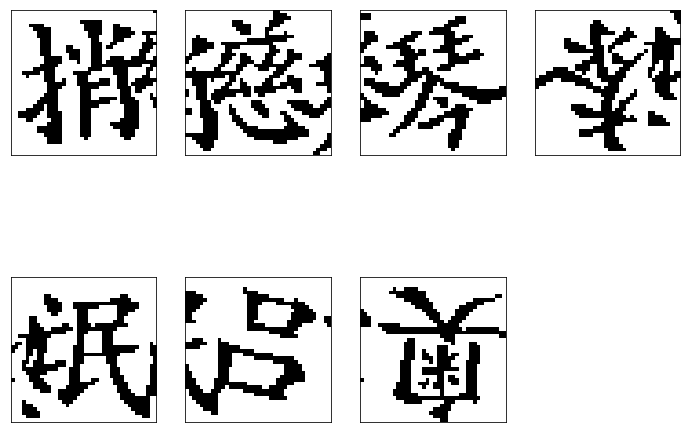

In [5]:
X = scissor(im)